In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd

In [90]:
data =   pd.read_csv("/content/Prediction.csv",
                   index_col="Date_Time", parse_dates=True).asfreq('H')


In [91]:
# Записываем значение "High" в столбец Danger_rate по найденному индексу
data.at['2023-12-04 05:00:00', 'Danger_rate'] = 'High'
data=data.replace(['Low', 'Moderate', 'Considerable', 'High'], [1,2,3,4])

In [92]:
data=data.drop(	'Unnamed: 0', axis=1)

In [93]:
data['Danger_rate']=data['Danger_rate'].fillna(0)
data['Humidity'] = data['Humidity'].fillna(data['Humidity'].mean())
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].mean())
data['Wind_direction'] = data['Wind_direction'].fillna(data['Wind_direction'].mean())
data['Wind_speed_avg'] = data['Wind_speed_avg'].fillna(data['Wind_speed_avg'].mean())
data['Wind_speed_max'] = data['Wind_speed_max'].fillna(data['Wind_speed_max'].mean())
data['Wind_speed_min'] = data['Wind_speed_min'].fillna(data['Wind_speed_min'].mean())

In [94]:
pred = data[data['Danger_rate'].isin([0, '0'])]
data = data[~data.isin(pred)].dropna()

In [95]:
data.shape

(1089, 7)

<Axes: xlabel='Danger_rate', ylabel='count'>

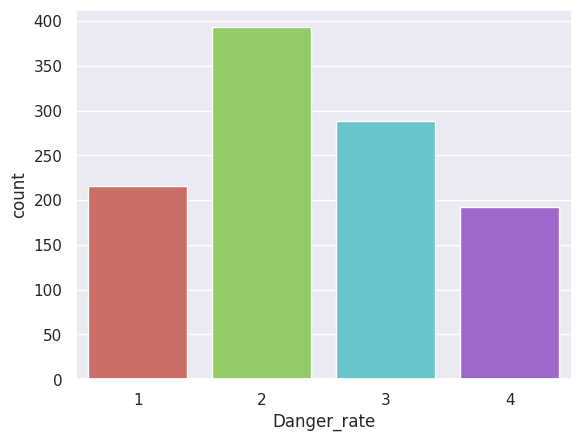

In [96]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x ="Danger_rate", data=data, palette='hls')


In [97]:
countrain=len(data[data.Danger_rate==0])
countsun=len(data[data.Danger_rate==1])
countdrizzle=len(data[data.Danger_rate==2])
countsnow=len(data[data.Danger_rate==3])
countfog=len(data[data.Danger_rate==4])

print('percent of Low:{:2f}%'.format((countsun/(len(data.Danger_rate))*100)))
print('percent of Moderate:drizzle:{:2f}%'.format((countdrizzle/(len(data.Danger_rate))*100)))
print('percent of Considerable:{:2f}%'.format((countsnow/(len(data.Danger_rate))*100)))
print('percent of High:{:2f}%'.format((countfog/(len(data.Danger_rate))*100)))

percent of Low:19.834711%
percent of Moderate:drizzle:36.088154%
percent of Considerable:26.446281%
percent of High:17.630854%


<Axes: xlabel='Wind_speed_min', ylabel='Count'>

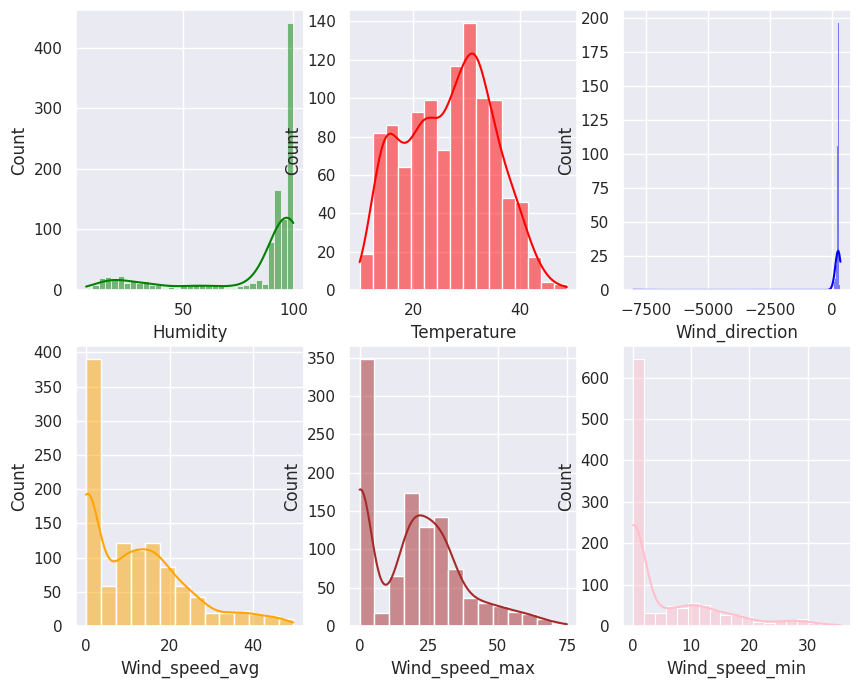

In [98]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,3,figsize=(10,8))
sns.histplot(data=data,x='Humidity',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='Temperature',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='Wind_direction',kde=True,ax=axs[0,2],color='blue')
sns.histplot(data=data,x='Wind_speed_avg',kde=True,ax=axs[1,0],color='orange')
sns.histplot(data=data,x='Wind_speed_max',kde=True,ax=axs[1,1],color='brown')
sns.histplot(data=data,x='Wind_speed_min',kde=True,ax=axs[1,2],color='pink')

<Axes: >

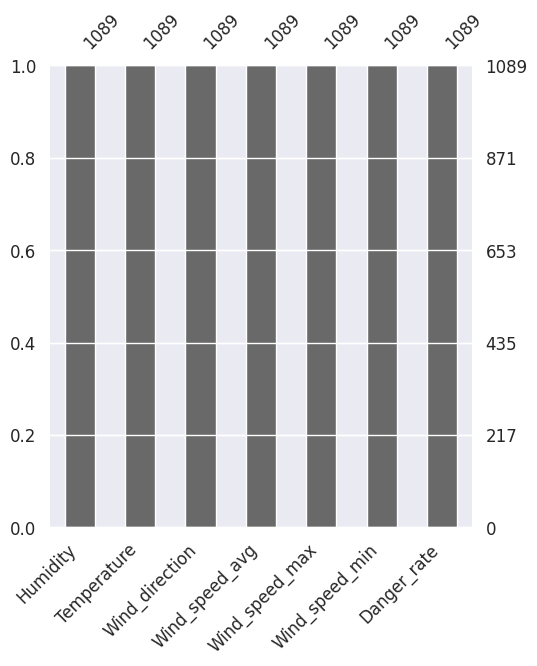

In [104]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data,ax=axz,fontsize=12)

In [105]:

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

<Axes: xlabel='Wind_speed_min', ylabel='Count'>

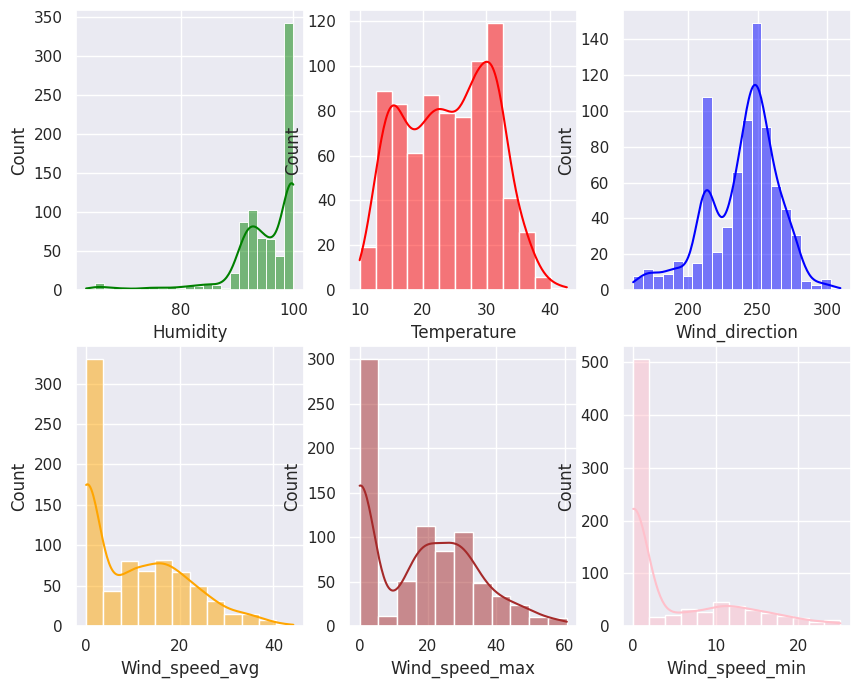

In [106]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,3,figsize=(10,8))
sns.histplot(data=data,x='Humidity',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='Temperature',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='Wind_direction',kde=True,ax=axs[0,2],color='blue')
sns.histplot(data=data,x='Wind_speed_avg',kde=True,ax=axs[1,0],color='orange')
sns.histplot(data=data,x='Wind_speed_max',kde=True,ax=axs[1,1],color='brown')
sns.histplot(data=data,x='Wind_speed_min',kde=True,ax=axs[1,2],color='pink')

In [108]:
excluded_columns = ['Danger_rate']
x = data.loc[:, ~data.columns.isin(excluded_columns)].astype(int).values

y=data['Danger_rate'].values

print(x)

[[ 92  16 247  26  40  16]
 [ 94  18 253  26  34  18]
 [ 94  18 234  26  38  14]
 ...
 [ 90  19 295   0   0   0]
 [ 89  20 247   0   0   0]
 [ 91  21 289   0   0   0]]


In [137]:
data.Danger_rate.unique()

array([3, 4, 2, 1], dtype=object)

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [120]:
knn=KNeighborsClassifier()
knn.fit(x_train.astype('double'),y_train.astype('double'))
print('KNN accuracy:{:.2f}%'.format(knn.score(x_train.astype('double'),y_train.astype('double'))*100))

KNN accuracy:82.28%


In [112]:
x_train,y_train

(array([[ 99,  24, 250,  19,  23,  13],
        [ 96,  20, 212,   0,   0,   0],
        [ 77,  27, 190,  17,  25,   1],
        ...,
        [ 99,  24, 212,   8,  20,   0],
        [ 97,  23, 258,  21,  32,   0],
        [100,  31, 248,  24,  53,   0]]),
 array([2, 2, 3, 4, 3, 1, 3, 3, 3, 3, 4, 1, 3, 1, 3, 4, 2, 4, 2, 2, 4, 2,
        3, 3, 3, 3, 2, 2, 2, 2, 4, 3, 3, 3, 4, 2, 4, 3, 2, 3, 1, 3, 3, 4,
        2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 3, 3, 4, 4, 4, 2, 2, 2,
        2, 2, 2, 3, 1, 2, 1, 3, 2, 3, 2, 3, 3, 4, 2, 4, 2, 3, 4, 2, 2, 2,
        2, 2, 4, 2, 2, 3, 4, 4, 3, 4, 4, 2, 4, 2, 2, 2, 3, 4, 3, 4, 2, 4,
        4, 4, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 1, 4, 3, 2, 3,
        3, 3, 2, 4, 2, 2, 3, 2, 2, 3, 2, 4, 3, 2, 2, 2, 4, 2, 2, 1, 3, 3,
        3, 1, 2, 3, 2, 3, 3, 2, 3, 2, 4, 2, 4, 4, 3, 2, 1, 3, 2, 1, 2, 2,
        3, 1, 2, 4, 1, 2, 3, 1, 4, 3, 3, 3, 3, 2, 3, 2, 4, 3, 2, 4, 2, 1,
        2, 2, 2, 1, 3, 3, 3, 2, 4, 1, 3, 4, 3, 3, 2, 2, 2, 4, 2, 4, 3, 3,
     

In [127]:
svm = SVC()
svm.fit(x_train.astype('double'), y_train.astype('double'))
print('SVM accuracy:{:.2f}%',(svm.score(x_train.astype('double'), y_train.astype('double'))*100))


SVM accuracy:{:.2f}% 47.9606188466948


In [132]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train.astype('double'), y_train.astype('double'))
print('GBC accuracy:{:.2f}%'.format(gbc.score(x_train.astype('double'), y_train.astype('double'))*100))

GBC accuracy:99.44%


In [135]:
# Изменяем метки в y_train и y_test на диапазон от 0 до 3
y_train_modified = y_train - 1
y_test_modified = y_test - 1

# Инициализируем модель и обучаем её
import warnings
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
xgb = XGBClassifier()
xgb.fit(x_train, y_train_modified)

# Оцениваем точность модели на тестовых данных
accuracy = xgb.score(x_test.astype('double'), y_test_modified.astype('double'))
print('XGB accuracy:{:.2f}%'.format(accuracy * 100))


XGB accuracy:82.28%


In [ ]:
# Получение предсказаний для всех данных из обучающей выборки
predictions = gbc.predict(x_test)

# Печать результатов предсказаний
for prediction in predictions:
    print('Predicted danger rate:', end=' ')
    if prediction == 0:
        print('1')
    elif prediction == 1:
        print('2')
    elif prediction == 2:
        print('3')
    elif prediction == 3:
        print('4')
    else:
        print('5')
print(pd.DataFrame({'Predicted': predictions, 'Actual': y_test}))

In [145]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test.astype('double'), predictions)
print('Accuracy score: {:.2f}%'.format(accuracy * 100))

Accuracy score: 84.81%


In [ ]:
pred

In [157]:
pred=pred.drop(	'Danger_rate', axis=1)

In [159]:
# Получение предсказаний для всех данных из обучающей выборки
# Получение прогнозов для каждой строки таблицы pred
for index, row in pred.iterrows():
    prediction = gbc.predict([row])  # Получение прогноза с использованием обученной модели gbc
    print('Predicted danger rate for row {}: {}'.format(index, prediction[0]))  # Печать предсказанного уровня опасности


Predicted danger rate for row 2024-01-15 09:00:00: 1.0
Predicted danger rate for row 2024-01-15 10:00:00: 2.0
Predicted danger rate for row 2024-01-15 11:00:00: 2.0
Predicted danger rate for row 2024-01-15 12:00:00: 2.0
Predicted danger rate for row 2024-01-15 13:00:00: 1.0
Predicted danger rate for row 2024-01-15 14:00:00: 3.0
Predicted danger rate for row 2024-01-15 15:00:00: 2.0
Predicted danger rate for row 2024-01-15 16:00:00: 2.0
Predicted danger rate for row 2024-01-15 17:00:00: 2.0
Predicted danger rate for row 2024-01-15 18:00:00: 2.0
Predicted danger rate for row 2024-01-15 19:00:00: 2.0
Predicted danger rate for row 2024-01-15 20:00:00: 2.0
Predicted danger rate for row 2024-01-15 21:00:00: 2.0
Predicted danger rate for row 2024-01-15 22:00:00: 3.0
Predicted danger rate for row 2024-01-15 23:00:00: 2.0
Predicted danger rate for row 2024-01-16 00:00:00: 2.0
Predicted danger rate for row 2024-01-16 01:00:00: 2.0
Predicted danger rate for row 2024-01-16 02:00:00: 2.0
Predicted 